In [1]:
# Import the neccesary libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
# Read data from the CSV file
data_df = pd.read_csv('data.csv')

In [3]:
# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i : i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

In [4]:
# Convert the Date column to a date object
data_df['Date'] = pd.to_datetime(data_df['Date'])

In [5]:
# Sort the data by Datetime
data_df.sort_values('Date', inplace=True)

In [6]:

data = data_df['Consumption'].values

In [7]:
# Scale the data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).flatten()

In [8]:
# Set the sequence length and split the data into train and test sets
sequence_length = 10
train_size = int(0.9 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

In [9]:
# Create sequences for training and testing
X_train = create_sequences(train_data, sequence_length)
y_train = train_data[sequence_length:]
X_test = create_sequences(test_data, sequence_length)
y_test = test_data[sequence_length:]

In [10]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
214/214 [==============================] - 2s 3ms/step - loss: 0.0119
Epoch 2/100
214/214 [==============================] - 1s 3ms/step - loss: 5.5929e-04
Epoch 3/100
214/214 [==============================] - 1s 3ms/step - loss: 4.9568e-04
Epoch 4/100
214/214 [==============================] - 1s 3ms/step - loss: 4.3646e-04
Epoch 5/100
214/214 [==============================] - 1s 3ms/step - loss: 3.8147e-04
Epoch 6/100
214/214 [==============================] - 1s 3ms/step - loss: 3.1412e-04
Epoch 7/100
214/214 [==============================] - 1s 3ms/step - loss: 2.4473e-04
Epoch 8/100
214/214 [==============================] - 1s 3ms/step - loss: 2.2738e-04
Epoch 9/100
214/214 [==============================] - 1s 3ms/step - loss: 2.2423e-04
Epoch 10/100
214/214 [==============================] - 1s 3ms/step - loss: 2.1538e-04
Epoch 11/100
214/214 [==============================] - 1s 3ms/step - loss: 2.0025e-04
Epoch 12/100
214/214 [==============================] - 

214/214 [==============================] - 1s 3ms/step - loss: 8.9812e-05
Epoch 96/100
214/214 [==============================] - 1s 3ms/step - loss: 8.8178e-05
Epoch 97/100
214/214 [==============================] - 1s 3ms/step - loss: 8.7193e-05
Epoch 98/100
214/214 [==============================] - 1s 3ms/step - loss: 8.7473e-05
Epoch 99/100
214/214 [==============================] - 1s 3ms/step - loss: 9.3913e-05
Epoch 100/100
214/214 [==============================] - 1s 3ms/step - loss: 8.7771e-05


In [12]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [13]:
# Inverse transform the predictions and actual values to their original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

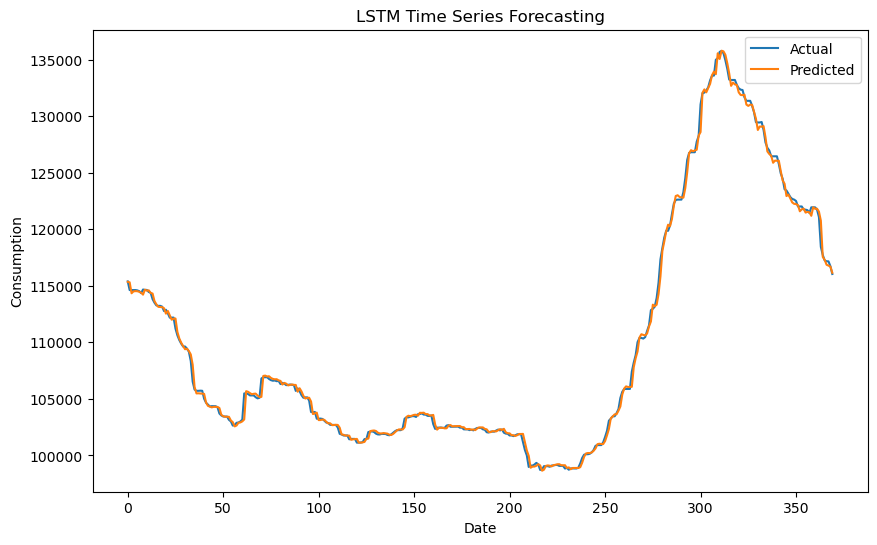

In [14]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('LSTM Time Series Forecasting')
plt.show()